In [1]:
import matplotlib as plt
import pandas as pd
import numpy as np
import seaborn as sns
from pydataset import data

In [2]:
# Use the iris database to answer the following quesitons:
iris = sns.load_dataset('iris')
iris.head()
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


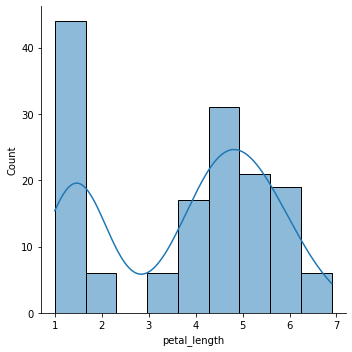

In [3]:
# 1. What does the distribution of petal lengths look like?
sns.displot(data = iris.petal_length, kde = True)

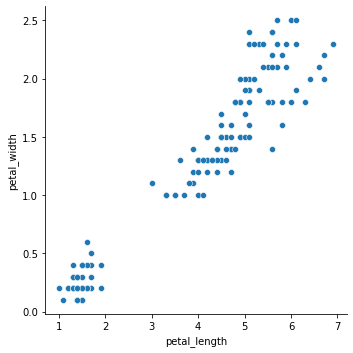

In [4]:
# 2. Is there a correlation between petal length and petal width? Use http://guessthecorrelation.com/ as 
# a hint to how we could visually determine if a correlation exists between two numeric columns.
sns.relplot(x = iris.petal_length, y = iris.petal_width)



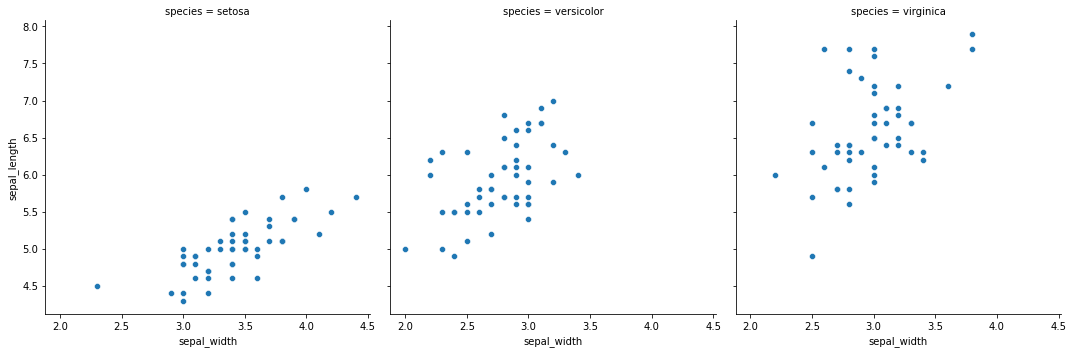

In [5]:
# 3. Would it be reasonable to predict species based on sepal width and sepal length? 
# For this, you'll visualize two numeric columns through the lense of a categorical column.
sns.relplot(data = iris, x = iris.sepal_width, y = iris.sepal_length, col = 'species')



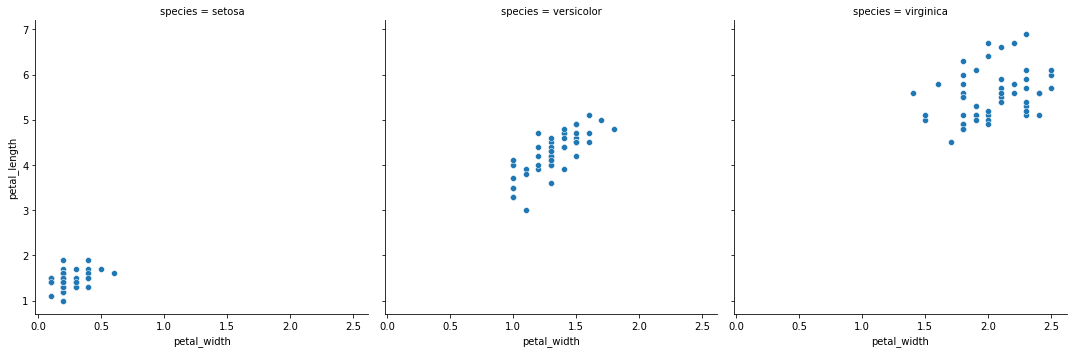

In [6]:
# 4. Which features would be best used to predict species?
sns.relplot(data = iris, x = 'petal_width', y = iris.petal_length, col = 'species')

## (Part 2)

In [7]:
# 1. Using the lesson as an example, use seaborn's load_dataset function to load the anscombe data set. Use pandas 
# to group the data by the dataset column, and calculate summary statistics for each dataset. What do you notice?
anscombe = sns.load_dataset('anscombe')
anscombe.head()
anscombe.info()
anscombe.groupby('dataset').describe()

# I notice that the the mean and standard deviation is the same for all of the datasets but the rest of the data diverges.
# This must mean that each dataset has differing shapes to their data.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dataset  44 non-null     object 
 1   x        44 non-null     float64
 2   y        44 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.2+ KB


x                                               y            \
        count mean       std  min  25%  50%   75%   max count      mean   
dataset                                                                   
I        11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
II       11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
III      11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500000   
IV       11.0  9.0  3.316625  8.0  8.0  8.0   8.0  19.0  11.0  7.500909   

                                                   
              std   min    25%   50%   75%    max  
dataset                                            
I        2.031568  4.26  6.315  7.58  8.57  10.84  
II       2.031657  3.10  6.695  8.14  8.95   9.26  
III      2.030424  5.39  6.250  7.11  7.98  12.74  
IV       2.030579  5.25  6.170  7.04  8.19  12.50

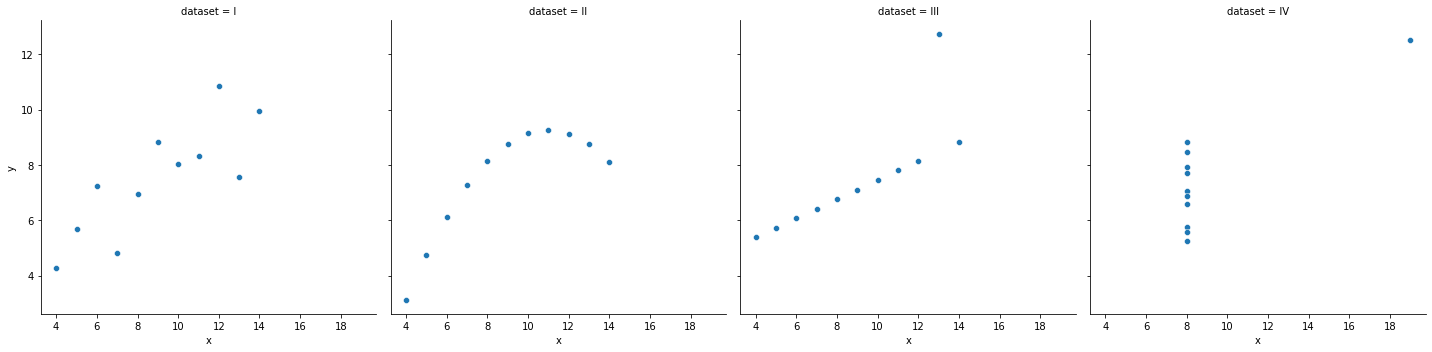

In [8]:
# Plot the x and y values from the anscombe data. Each dataset should be in a separate column.
sns.relplot(data = anscombe, x='x', y='y', col = 'dataset')

In [9]:
# 2. Load the InsectSprays dataset and read it's documentation. 
bug_spray = data('InsectSprays')
data('InsectSprays', show_doc = True)
bug_spray.info()

InsectSprays

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Effectiveness of Insect Sprays

### Description

The counts of insects in agricultural experimental units treated with
different insecticides.

### Usage

    InsectSprays

### Format

A data frame with 72 observations on 2 variables.

[,1]

count

numeric

Insect count

[,2]

spray

factor

The type of spray

### Source

Beall, G., (1942) The Transformation of data from entomological field
experiments, _Biometrika_, **29**, 243–262.

### References

McNeil, D. (1977) _Interactive Data Analysis_. New York: Wiley.

### Examples

    require(stats); require(graphics)
    boxplot(count ~ spray, data = InsectSprays,
            xlab = "Type of spray", ylab = "Insect count",
            main = "InsectSprays data", varwidth = TRUE, col = "lightgray")
    fm1 <- aov(count ~ spray, data = InsectSprays)
    summary(fm1)
    opar <- par(mfrow = c(2, 2), oma = c(0, 0, 1.1, 0))
    plot(fm1)
 

<AxesSubplot:xlabel='count', ylabel='spray'>

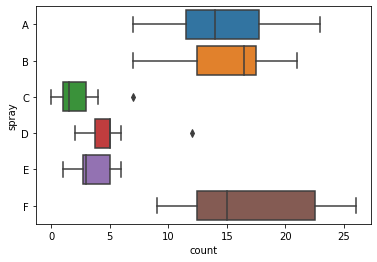

In [10]:
# Create a boxplot that shows the effectiveness of the different insect sprays.
sns.boxplot(data = bug_spray, x = 'count', y = 'spray')


In [11]:
# 3. Load the swiss dataset and read it's documentation. The swiss dataset is available from pydatset rather than seaborn. 
swiss = data('swiss')
swiss.info()
data('swiss', show_doc = True)



<class 'pandas.core.frame.DataFrame'>
Index: 47 entries, Courtelary to Rive Gauche
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Fertility         47 non-null     float64
 1   Agriculture       47 non-null     float64
 2   Examination       47 non-null     int64  
 3   Education         47 non-null     int64  
 4   Catholic          47 non-null     float64
 5   Infant.Mortality  47 non-null     float64
dtypes: float64(4), int64(2)
memory usage: 2.6+ KB
swiss

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Swiss Fertility and Socioeconomic Indicators (1888) Data

### Description

Standardized fertility measure and socio-economic indicators for each of 47
French-speaking provinces of Switzerland at about 1888.

### Usage

    data(swiss)

### Format

A data frame with 47 observations on 6 variables, each of which is in percent,
i.e., in [0,100].

[,1] Fertilit

In [12]:
# Create visualizations to answer the following questions:
swiss.head()

# Create an attribute named is_catholic that holds a boolean value of whether or not the province is Catholic. (Choose a cutoff point for what constitutes catholic)
swiss["is_catholic"] = swiss.Catholic > 60
swiss


,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality,is_catholic
Courtelary,80.2,17.0,15,12,9.96,22.2,False
Delemont,83.1,45.1,6,9,84.84,22.2,True
Franches-Mnt,92.5,39.7,5,5,93.40,20.2,True
Moutier,85.8,36.5,12,7,33.77,20.3,False
Neuveville,76.9,43.5,17,15,5.16,20.6,False
Porrentruy,76.1,35.3,9,7,90.57,26.6,True
Broye,83.8,70.2,16,7,92.85,23.6,True
Glane,92.4,67.8,14,8,97.16,24.9,True
Gruyere,82.4,53.3,12,7,97.67,21.0,True
Sarine,82.9,45.2,16,13,91.38,24.4,True


<AxesSubplot:xlabel='is_catholic', ylabel='Fertility'>

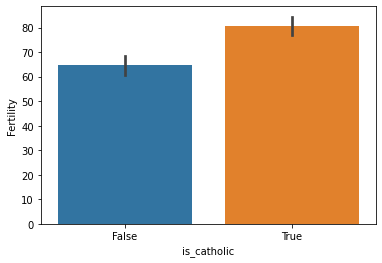

In [13]:
# Does whether or not a province is Catholic influence fertility?
sns.barplot(data = swiss, y = 'Fertility', x = 'is_catholic')


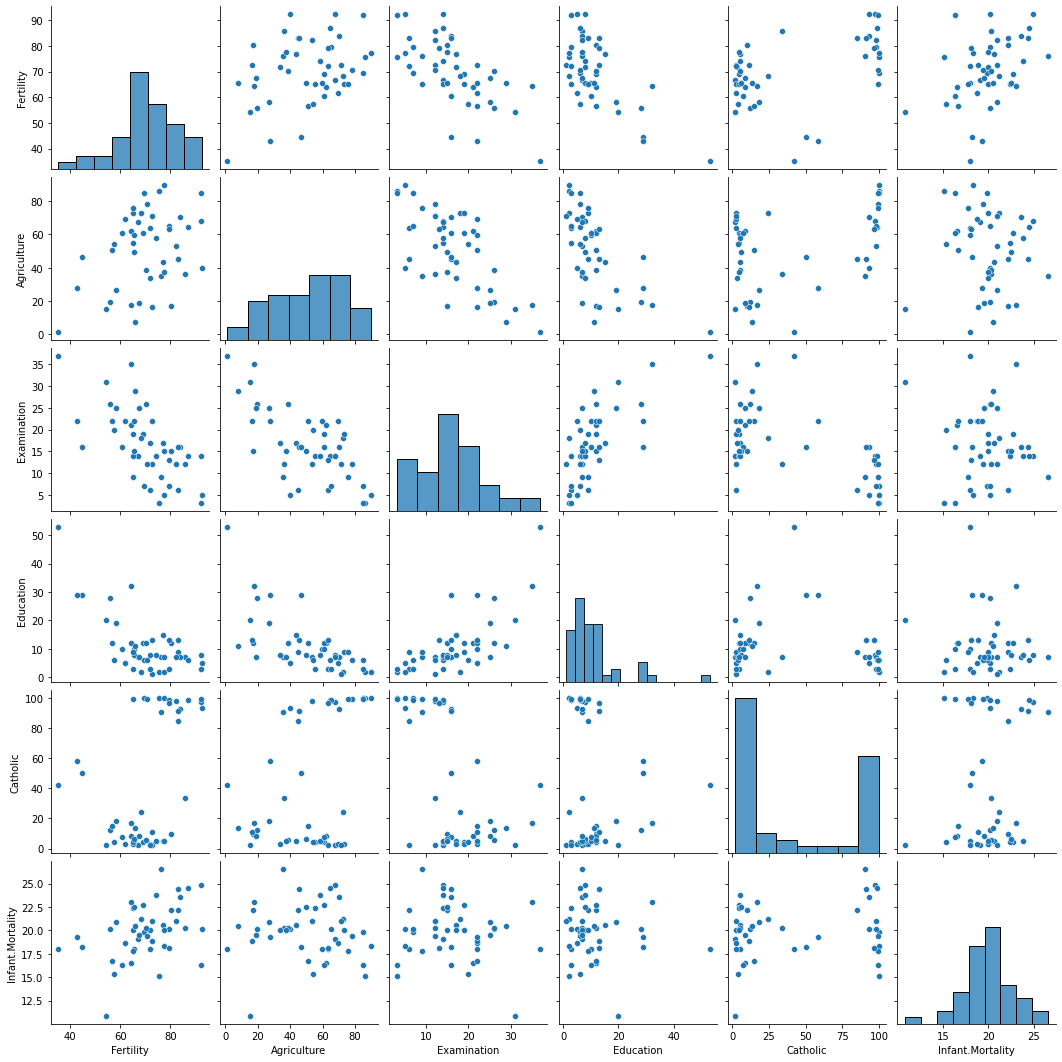

In [14]:
# What measure correlates most strongly with fertility?
sns.pairplot(swiss.drop("is_catholic", axis = 1))

# From the data displayed below, it looks like infant mortality and Fertility are more correlated than others.

In [15]:
# 4. Using the chipotle dataset from the previous exercise, create a bar chart that shows the 
# 4 most popular items and the revenue produced by each.
import env
url = env.get_db_url('chipotle')

chipo = pd.read_sql('SELECT * FROM orders', url)
mostpop = chipo.groupby(chipo.item_name).quantity.sum().nlargest(n=4, keep='all')
# The four most popular items by items sold are
mostpop

item_name
Chicken Bowl           761
Chicken Burrito        591
Chips and Guacamole    506
Steak Burrito          386
Name: quantity, dtype: int64

In [17]:
cleaned = chipo['item_price'].str[1:].astype(float)
chipo['cleaned'] = cleaned
chipo[chipo.item_name.isin(mostpop.index)].groupby('item_name').cleaned.sum()
# The four most popular items' revenues are as follows:

item_name
Chicken Bowl           7342.73
Chicken Burrito        5575.82
Chips and Guacamole    2201.04
Steak Burrito          3851.43
Name: cleaned, dtype: float64

In [22]:
# 5. Load the sleepstudy data and read it's documentation. 

data('sleepstudy', show_doc = True)
sleep = data('sleepstudy')
sleep.head()

sleepstudy

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Reaction times in a sleep deprivation study

### Description

The average reaction time per day for subjects in a sleep deprivation study.
On day 0 the subjects had their normal amount of sleep. Starting that night
they were restricted to 3 hours of sleep per night. The observations represent
the average reaction time on a series of tests given each day to each subject.

### Format

A data frame with 180 observations on the following 3 variables.

`Reaction`

Average reaction time (ms)

`Days`

Number of days of sleep deprivation

`Subject`

Subject number on which the observation was made.

### Details

These data are from the study described in Belenky et al. (2003), for the
sleep-deprived group and for the first 10 days of the study, up to the
recovery period.

### References

Gregory Belenky, Nancy J. Wesensten, David R. Thorne, Maria L. Thomas, Helen
C. Sing, Daniel P. Redmond, 

,Reaction,Days,Subject
1,249.5600,0,308
2,258.7047,1,308
3,250.8006,2,308
4,321.4398,3,308
5,356.8519,4,308


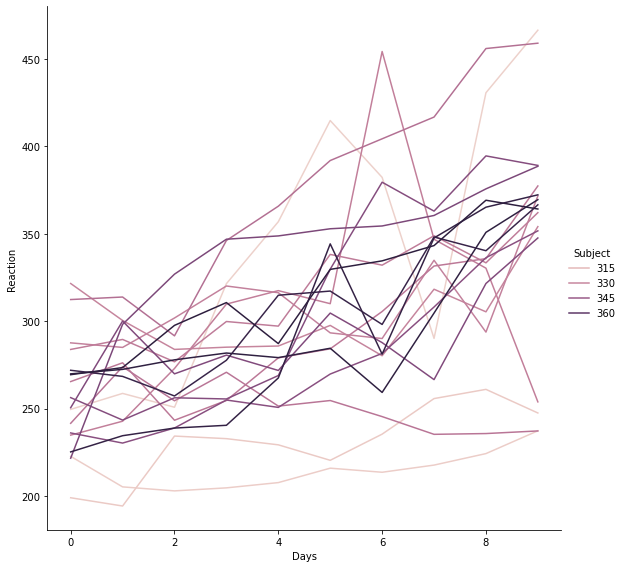

In [53]:
# Use seaborn to create a line chart of all the individual subject's reaction times and a more prominant line 
# showing the average change in reaction time.

avgreac= sleep.groupby('Days').Reaction.mean()

sns.relplot(data=sleep, x='Days', y='Reaction', hue='Subject', kind='line', height = 8)

# Can't get the following to go on top...
# sns.relplot(data=sleep, x='Days', y='Reaction', kind='line', height = 8)